In [3]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

%matplotlib inline

# Gather

In [4]:
# Load the enhanced twitter archive file we were given
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [7]:
# Setting up the Twitter API with authentication pieces
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
836380477523124226
829374341691346946
827228250799742977
812747805718642688
802247111496568832
794983741416415232
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368
719367763014393856
707014260413456384
682662431982772225
682638830361513985
682429480204398592
682406705142087680
682393905736888321
682389078323662849
682303737705140231
682259524040966145
682242692827447297
682088079302213632
682059653698686977
682047327939461121
682032003584274432
682003177596559360
681981167097122816
681891461017812993
681694085539872773
681679526984871937
681654059175129088
681610798867845120
681579835668455424
681523177663676416
681340665377193984
681339448655802368
681320187870

670797304698376195
670792680469889025
670789397210615808
670786190031921152
670783437142401025
670782429121134593
670780561024270336
670778058496974848
670764103623966721
670755717859713024
670733412878163972
670727704916926465
670717338665226240
670704688707301377
670691627984359425
670679630144274432
670676092097810432
670668383499735048
670474236058800128
670468609693655041
670465786746662913
670452855871037440
670449342516494336
670444955656130560
670442337873600512
670435821946826752
670434127938719744
670433248821026816
670428280563085312
670427002554466305
670421925039075328
670420569653809152
670417414769758208
670411370698022913
670408998013820928
670403879788544000
670385711116361728
670374371102445568
670361874861563904
670338931251150849
670319130621435904
670303360680108032
670290420111441920
670093938074779648
670086499208155136
670079681849372674
670073503555706880
670069087419133954
670061506722140161
670055038660800512
670046952931721218
670040295598354432
670037189829

In [9]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [10]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweet_id_success
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]

# Assess

In [11]:
twitter1.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
694   786729988674449408                    NaN                  NaN   
1789  677547928504967168                    NaN                  NaN   
519   810284430598270976                    NaN                  NaN   

                      timestamp  \
694   2016-10-14 00:47:00 +0000   
1789  2015-12-17 17:56:29 +0000   
519   2016-12-18 00:43:57 +0000   

                                                 source  \
694   <a href="http://twitter.com/download/iphone" r...   
1789  <a href="http://twitter.com/download/iphone" r...   
519   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
694   RT @dog_rates: This is Oakley. He has no idea ...         7.594477e+17   
1789  Not much to say here. I just think everyone ne...                  NaN   
519   This is Phil. He's a father. A very good fathe...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
694               4.196984e+09  2016-07-30 17:56:51 +0000   
1789                       NaN                        NaN   
519                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
694   https://twitter.com/dog_rates/status/759447681...                11   
1789  https://twitter.com/dog_rates/status/677547928...                12   
519   https://twitter.com/dog_rates/status/810284430...                13   

      rating_denominator    name doggo floofer pupper puppo  
694                   10  Oakley  None    None   None  None  
1789                  10    None  None    None   None  None  
519                   10    Phil  None    None   None  None

In [12]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [14]:
twitter1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter1['text'].value_counts()

This is Barclay. His father was a banana. 11/10 appeeling af https://t.co/ucOEfr2rjV                                                              1
This is Terry. The harder you hug him the farther his tongue sticks out. 10/10 magical af https://t.co/RFToQQI8fJ                                 1
Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A      1
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq    1
Can you spot Toby the guilty pupper? 7/10 would be higher but he made quite the mess shredding his stuffed pals https://t.co/3uCcDEJLXs           1
                                                                                                                                                 ..
What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 

In [16]:
twitter1['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [17]:
twitter1['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [18]:
twitter1['retweeted_status_timestamp'].value_counts()

2017-01-04 01:05:59 +0000    1
2016-09-13 16:30:07 +0000    1
2016-10-26 22:31:36 +0000    1
2016-02-19 18:24:26 +0000    1
2016-11-20 00:59:15 +0000    1
                            ..
2017-02-16 23:23:38 +0000    1
2016-07-25 15:23:28 +0000    1
2016-09-26 17:55:00 +0000    1
2017-05-05 18:36:06 +0000    1
2017-01-14 17:00:24 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [19]:
twitter1['expanded_urls'].value_counts()

https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1                                                                                                                                                          2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1                       2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/676936541936185344/photo/1                                                                                                                                                          

In [20]:
twitter1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter1['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Meatball      1
Dietrich      1
Dwight        1
Stormy        1
Sweet         1
Name: name, Length: 957, dtype: int64

In [23]:
twitter1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
twitter1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
twitter1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
twitter1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
twitter1.loc[twitter1['name'].str.isupper()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775   776201521193218049                    NaN                  NaN   
2041  671542985629241344                    NaN                  NaN   

                      timestamp  \
775   2016-09-14 23:30:38 +0000   
2041  2015-12-01 04:14:59 +0000   

                                                 source  \
775   <a href="http://twitter.com/download/iphone" r...   
2041  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
775   This is O'Malley. That is how he sleeps. Doesn...                  NaN   
2041  This is JD (stands for "just dog"). He's like ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
775                        NaN                        NaN   
2041                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
775   https://twitter.com/dog_rates/status/776201521...                10   
2041  https://twitter.com/dog_rates/status/671542985...                10   

      rating_denominator name doggo floofer pupper puppo  
775                   10    O  None    None   None  None  
2041                  10   JD  None    None   None  None

In [28]:
twitter2.sample(5)

tweet_id  favorite_count  retweet_count
364   827600520311402496            7520            955
932   751456908746354688            3238           1008
833   763956972077010945             762             56
397   822859134160621569           13464           2321
1348  701805642395348998            3412           1673

In [29]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1654 non-null   int64
 1   favorite_count  1654 non-null   int64
 2   retweet_count   1654 non-null   int64
dtypes: int64(3)
memory usage: 38.9 KB


In [30]:
twitter2['tweet_id'].value_counts()

749075273010798592    1
732726085725589504    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
834209720923721728    1
775733305207554048    1
879492040517615616    1
720775346191278080    1
700151421916807169    1
Name: tweet_id, Length: 1654, dtype: int64

In [31]:
twitter2['favorite_count'].value_counts()

0        160
2791       3
9605       2
5133       2
5467       2
        ... 
8138       1
25872      1
15633      1
5395       1
3391       1
Name: favorite_count, Length: 1435, dtype: int64

In [32]:
twitter2['retweet_count'].value_counts()

2371    3
449     3
737     3
2066    3
1973    3
       ..
1272    1
957     1
1277    1
3326    1
1       1
Name: retweet_count, Length: 1358, dtype: int64

In [33]:
images.sample(5)

tweet_id                                          jpg_url  \
840   694669722378485760  https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg   
1280  750132105863102464  https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg   
1981  871515927908634625  https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg   
1304  753294487569522689  https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg   
1726  820314633777061888  https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg   

      img_num             p1   p1_conf  p1_dog                       p2  \
840         2         beaver  0.457094   False                 mongoose   
1280        1     toy_poodle  0.478018    True         miniature_poodle   
1981        2       komondor  0.974781    True                   briard   
1304        1           chow  0.194773    True                  monitor   
1726        2  Gordon_setter  0.940724    True  black-and-tan_coonhound   

       p2_conf  p2_dog              p3   p3_conf  p3_dog  
840   0.228298   False          marmot  0.148309   False  
1280  0.207458    True    croquet_ball  0.085879   False  
1981  0.020041    True            swab  0.003228   False  
1304  0.102305   False  Siberian_husky  0.086855    True  
1726  0.042041    True      Rottweiler  0.009417    True

In [34]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [36]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg                                            1
https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg                                            1
https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg                                            1
https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg                                            1
https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg                       

In [37]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [38]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
bib                     1
fire_engine             1
pitcher                 1
revolver                1
Name: p1, Length: 378, dtype: int64

In [39]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [40]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
iPod                    1
stove                   1
projectile              1
mashed_potato           1
pier                    1
Name: p2, Length: 405, dtype: int64

In [42]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [43]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [44]:
images['p3'].value_counts()

Labrador_retriever     79
Chihuahua              58
golden_retriever       48
Eskimo_dog             38
kelpie                 35
                       ..
desktop_computer        1
screw                   1
American_black_bear     1
greenhouse              1
pier                    1
Name: p3, Length: 408, dtype: int64

In [45]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [46]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Quality Issues (not all issues will be cleaned)

#### twitter1 dataframe
* Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
* tweet_id is an integer
* timestamp and retweeted_status_timestamp are currently of type 'object'
* source is in HTML format with a and \a tags surrounding the text
* name has values that are the string "None" instead of NaN
* Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc.  Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.  It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
* Found an instance of a name being "O" instead of "O'Malley"
* doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
* Upon visual inspection in Excel, there are ratings that are incorrect.  I ordered the ratings from low to high and looked at the extremes only for incorrect ratings therefore there are likely more than I missed and will be difficult to find them all programmatically.  Examples where things may have gone wrong is the use of decimals, or when two instances of numbers separated by a slash are present in 1 text and I assume the first was chosen.  Also, there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).  There are instances of 1/2 and 50/50 which are not ratings such signifying "half" which have been considered as ratings. Finally, use of 4/20 and 24/7 has been confused as ratings. 
* For future analysis it could be confusing to interpret unstandardized ratings.  It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
* There are many columns in this dataframe making it hard to read, and some will not be needed for analysis

#### twitter2 dataframe
* There are 11 missing tweets compared to the twitter1 datagrame (I am assuming they have been deleted)

#### images dataframe
* There are 2356 tweets in the twitter1 dataframe and 2075 rows in the images dataframe.  This could mean that there is missing data, or that not all 2356 of the tweets had pictures. 
* tweet_id is an integer
* p1, p2, and p3 contain underscores instead of spaces in the labels


### Tidiness Issues

#### twitter1 dataframe
* 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### twitter2 dataframe
* twitter2 data should be combined with the twitter1 data since they are information about the same tweet

#### images dataframe
* images data could be combined with the twitter1 data as well since it is all information about 1 tweet


# Clean

In [47]:
# Make copies of the dataframes for cleaning

twitter1_clean = twitter1.copy()
twitter2_clean = twitter2.copy()
images_clean = images.copy()

## Tidiness issue 1 - Merge all dataframes

### Define

**Issue**: twitter2 and images data should be combined with the twitter1 data since they are information about the same tweet
<br>**Solution**: Merge the 3 datasets together on 'tweet_id' using the reduce function.

### Code

In [48]:
# Merge the twitter1, twitter2, and images dataframes on 'tweet_id'
dfs = [twitter1_clean, twitter2_clean, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

### Test

In [49]:
# View first few lines of new twitter dataframe to ensure the columns have merged
twitter.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  ...  img_num         p1  \
0  https://twitter.com/dog_rates/status/892420643...  ...        1     orange   
1  https://twitter.com/dog_rates/status/892177421...  ...        1  Chihuahua   

    p1_conf p1_dog        p2   p2_conf p2_dog        p3   p3_conf p3_dog  
0  0.097049  False     bagel  0.085851  False    banana  0.076110  False  
1  0.323581   True  Pekinese  0.090647   True  papillon  0.068957   True  

[2 rows x 30 columns]

In [50]:
# View info of new twitter dataframe to ensure the columns have merged
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1406
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1407 non-null   int64  
 1   in_reply_to_status_id       15 non-null     float64
 2   in_reply_to_user_id         15 non-null     float64
 3   timestamp                   1407 non-null   object 
 4   source                      1407 non-null   object 
 5   text                        1407 non-null   object 
 6   retweeted_status_id         69 non-null     float64
 7   retweeted_status_user_id    69 non-null     float64
 8   retweeted_status_timestamp  69 non-null     object 
 9   expanded_urls               1407 non-null   object 
 10  rating_numerator            1407 non-null   int64  
 11  rating_denominator          1407 non-null   int64  
 12  name                        1407 non-null   object 
 13  doggo                       1407 

## Tidiness issue 2 - One column for dog stages

### Define

**Issue**: 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)
<br>**Solution**: Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.  This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".  

### Code

In [51]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [52]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

dog_stage  doggo floofer pupper  puppo
0        NaN   None    None   None   None
1        NaN   None    None   None   None
2        NaN   None    None   None   None
3        NaN   None    None   None   None
4        NaN   None    None   None   None
5        NaN   None    None   None   None
6        NaN   None    None   None   None
7        NaN   None    None   None   None
8        NaN   None    None   None   None
9      doggo  doggo    None   None   None
10       NaN   None    None   None   None
11       NaN   None    None   None   None
12     puppo   None    None   None  puppo
13       NaN   None    None   None   None
14     puppo   None    None   None  puppo

In [53]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [54]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1406
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1407 non-null   int64  
 1   in_reply_to_status_id       15 non-null     float64
 2   in_reply_to_user_id         15 non-null     float64
 3   timestamp                   1407 non-null   object 
 4   source                      1407 non-null   object 
 5   text                        1407 non-null   object 
 6   retweeted_status_id         69 non-null     float64
 7   retweeted_status_user_id    69 non-null     float64
 8   retweeted_status_timestamp  69 non-null     object 
 9   expanded_urls               1407 non-null   object 
 10  rating_numerator            1407 non-null   int64  
 11  rating_denominator          1407 non-null   int64  
 12  name                        1407 non-null   object 
 13  favorite_count              1407 

## Quality issue 1 - Remove retweets

### Define

**Issue**: Data contains retweets
<br>**Solution**: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.  

### Code

In [55]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1406
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1338 non-null   int64  
 1   in_reply_to_status_id       15 non-null     float64
 2   in_reply_to_user_id         15 non-null     float64
 3   timestamp                   1338 non-null   object 
 4   source                      1338 non-null   object 
 5   text                        1338 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1338 non-null   object 
 10  rating_numerator            1338 non-null   int64  
 11  rating_denominator          1338 non-null   int64  
 12  name                        1338 non-null   object 
 13  favorite_count              1338 

### Test

In [56]:
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1406
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1338 non-null   int64  
 1   in_reply_to_status_id  15 non-null     float64
 2   in_reply_to_user_id    15 non-null     float64
 3   timestamp              1338 non-null   object 
 4   source                 1338 non-null   object 
 5   text                   1338 non-null   object 
 6   expanded_urls          1338 non-null   object 
 7   rating_numerator       1338 non-null   int64  
 8   rating_denominator     1338 non-null   int64  
 9   name                   1338 non-null   object 
 10  favorite_count         1338 non-null   int64  
 11  retweet_count          1338 non-null   int64  
 12  jpg_url                1338 non-null   object 
 13  img_num                1338 non-null   int64  
 14  p1                     1338 non-null   object 
 15  p1_c

## Quality issue 2 - tweet_id is an integer 

### Define

**Issue**: tweet_id is an integer
<br>**Solution**: Change tweet_id to a string/object

### Code

In [57]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

### Test

In [58]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1406
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1338 non-null   object 
 1   in_reply_to_status_id  15 non-null     float64
 2   in_reply_to_user_id    15 non-null     float64
 3   timestamp              1338 non-null   object 
 4   source                 1338 non-null   object 
 5   text                   1338 non-null   object 
 6   expanded_urls          1338 non-null   object 
 7   rating_numerator       1338 non-null   int64  
 8   rating_denominator     1338 non-null   int64  
 9   name                   1338 non-null   object 
 10  favorite_count         1338 non-null   int64  
 11  retweet_count          1338 non-null   int64  
 12  jpg_url                1338 non-null   object 
 13  img_num                1338 non-null   int64  
 14  p1                     1338 non-null   object 
 15  p1_c

## Quality issue 3 - 'timestamp' type

### Define

**Issue**: 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object'
<br>**Solution**: Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)

### Code

In [59]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [60]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test

In [61]:
# Confirm that 'timestamp' column is now a datetime object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1406
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1338 non-null   object        
 1   in_reply_to_status_id  15 non-null     float64       
 2   in_reply_to_user_id    15 non-null     float64       
 3   timestamp              1338 non-null   datetime64[ns]
 4   source                 1338 non-null   object        
 5   text                   1338 non-null   object        
 6   expanded_urls          1338 non-null   object        
 7   rating_numerator       1338 non-null   int64         
 8   rating_denominator     1338 non-null   int64         
 9   name                   1338 non-null   object        
 10  favorite_count         1338 non-null   int64         
 11  retweet_count          1338 non-null   int64         
 12  jpg_url                1338 non-null   object        
 13  img

## Quality issue 4/5/6 - Various issues with 'name'

### Define

**Issue**: 
1. name has values that are the string "None" instead of NaN
2. Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc.  Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.  It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies. 
3. I also found an instand of a name being "O" instead of "O'Malley" <br>

**Solution**: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

### Code

In [62]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the']


In [63]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

### Test

In [64]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter['name'].value_counts()

Cooper     9
Oliver     9
Lucy       8
Charlie    8
Tucker     8
          ..
Pawnd      1
Bruno      1
Grizzie    1
Leela      1
Corey      1
Name: name, Length: 691, dtype: int64

## Quality issue 7 - Inaccurate ratings

### Define

**Issue**: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).  
<br>**Solution**: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

### Code

In [65]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

In [66]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[40, 546, 601]

In [67]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

IndexError: list index out of range

### Test

In [68]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter.loc[40]

tweet_id                                                883482846933004288
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-08 00:28:19
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Bella. She hopes her smile made you sm...
expanded_urls            https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      13.5
rating_denominator                                                      10
name                                                                 Bella
favorite_count                                                       43062
retweet_count                                                         9035
jpg_url                    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                  

## Quality issue 8 - Unstandardized ratings

### Define

**Issue**: For future analysis it could be confusing to interpret unstandardized ratings.  It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
<br>**Solution**: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### Code

In [69]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

### Test

In [70]:
# Check for presence of new column and correct calculation
twitter.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   

   rating_denominator     name  ...   p1_conf  p1_dog     p2   p2_conf p2_dog  \
0                  10  Phineas  ...  0.097049   False  bagel  0.085851  False   

       p3  p3_conf p3_dog  dog_stage  rating  
0  banana  0.07611  False        NaN     1.3  

[1 rows x 25 columns]

## Quality issue 9 - Unnessary columns and text cut off

### Define

**Issue**: There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.  In addition some of the text in the table output is cut off.
<br>**Solution**: Drop undesired columns and change table display settings.

### Code

In [71]:
# View all column names
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'rating'],
      dtype='object')

In [72]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None) 

### Test

In [73]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter.head(1)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  numerator  denominator  \
0  https://twitter.com/dog_rates/status/892420643...       13.0           10   

      name  favorite_count  retweet_count  \
0  Phineas           36294           7724   

                                           jpg_url      p1   p1_conf  p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  orange  0.097049   False   

      p2   p2_conf  p2_dog      p3  p3_conf  p3_dog dog_stage  rating  
0  bagel  0.085851   False  banana  0.07611   False       NaN     1.3

# Storing Dataframe

In [74]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

# Anayze and Visualize

C:\Users\sshrima1\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


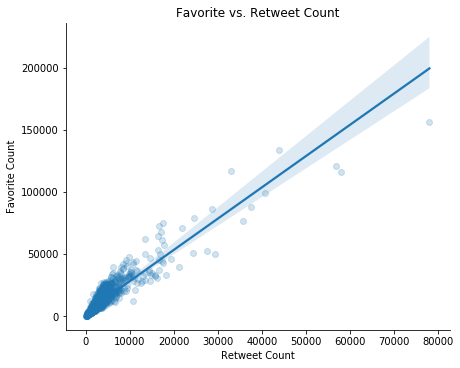

In [75]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated.  For about every 4 favorites there is 1 retweet.  The majority of the data falls below 40000 favorites and 10000 retweets.

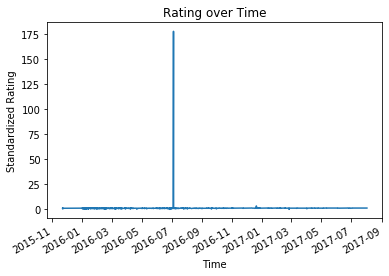

In [76]:
# Plot standardized ratings over time
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [77]:
# There are 3 outliers with a rating over 2.  
# Find them to see if they are inaccurate or just unique.
twitter.loc[twitter['rating'] > 2]

tweet_id           timestamp  \
405  810984652412424192 2016-12-19 23:06:23   
787  749981277374128128 2016-07-04 15:00:45   

                                                  text  \
405  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
787  This is Atticus. He's quite simply America af....   

                                         expanded_urls  numerator  \
405  https://www.gofundme.com/sams-smile,https://tw...       24.0   
787  https://twitter.com/dog_rates/status/749981277...     1776.0   

     denominator     name  favorite_count  retweet_count  \
405            7      Sam            5451           1471   
787           10  Atticus            5146           2478   

                                             jpg_url                p1  \
405  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg  golden_retriever   
787  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg           bow_tie   

      p1_conf  p1_dog               p2   p2_conf  p2_dog                  p3  \
405  0.871342    True  Tibetan_mastiff  0.036708    True  Labrador_retriever   
787  0.533941   False       sunglasses  0.080822   False            sunglass   

      p3_conf  p3_dog dog_stage      rating  
405  0.025823    True       NaN    3.428571  
787  0.050776   False       NaN  177.600000

The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix.  If we were required to fix all problems then thix tweet could be removed but I will ignore in this case.  The other 2 tweets are accurate ratings that are jokes.  I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

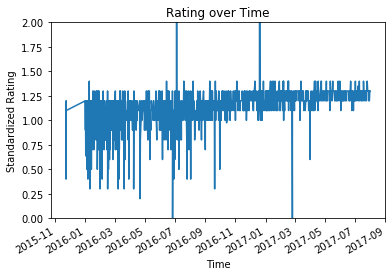

In [78]:
# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

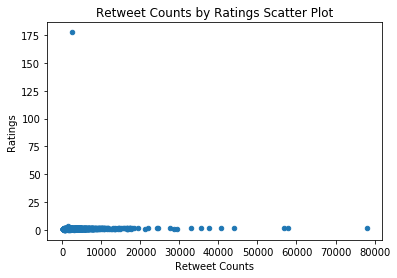

In [84]:
twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

Indeed it appears that overtime the frequency of ratings below 1 decreases.  Before 2016-11 there many ratings below 1, while after that time there are barely any.